In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd


In [2]:
df_income_cost = pd.read_excel('Sumrzd_data.xlsx', engine="openpyxl", sheet_name=None, index_col=0)

In [3]:
X = df_income_cost['R99.xlsx']

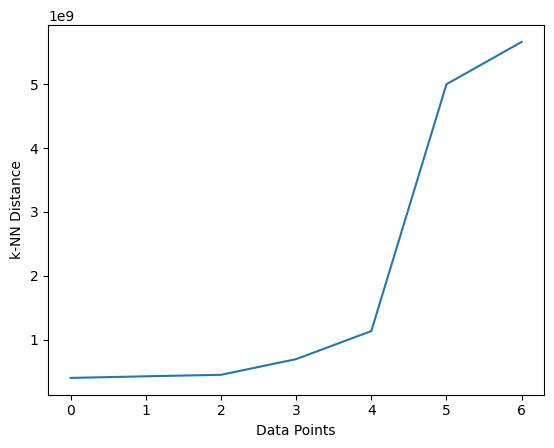

In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt


neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[17825:, 1]
plt.plot(distances)
plt.ylabel('k-NN Distance')
plt.xlabel('Data Points')
plt.show()

In [7]:
distances

array([3.98957023e+08, 4.24305771e+08, 4.47869985e+08, 6.93369046e+08,
       1.13282952e+09, 5.00001716e+09, 5.66315819e+09])

In [8]:
eps_value = (distances[4] + distances[5]) / 2

In [9]:
eps_value

372805491.1544868

In [10]:
from collections import Counter


In [ ]:
flag = 0
limit_range = 10
while flag != 1:
    print(eps_value)
    print('*'*30)
    
    for min_s in range(1, limit_range):
        dbscan = DBSCAN(eps=eps_value, min_samples=min_s)
        clusters = dbscan.fit_predict(X)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        print(f'min_samples = {min_s}, Number of clusters: {n_clusters}')
        if n_clusters == 10:
            cluster_counts = Counter(clusters)
            for cluster_id, count in cluster_counts.items():
                if cluster_id == -1:
                    print(f"Noise points: {count}")
                else:
                    print(f"Cluster {cluster_id}: {count} points")
    else:

        if n_clusters >= limit_range:
            limit_range += 20
        eps_value = eps_value * 0.98
        

372805491.1544868
******************************
min_samples = 1, Number of clusters: 10
Cluster 0: 17818 points
Cluster 1: 5 points
Cluster 2: 1 points
Cluster 3: 1 points
Cluster 4: 1 points
Cluster 5: 1 points
Cluster 6: 2 points
Cluster 7: 1 points
Cluster 8: 1 points
Cluster 9: 1 points
min_samples = 2, Number of clusters: 3
min_samples = 3, Number of clusters: 2
min_samples = 4, Number of clusters: 2
min_samples = 5, Number of clusters: 2
min_samples = 6, Number of clusters: 1
min_samples = 7, Number of clusters: 1
min_samples = 8, Number of clusters: 1
min_samples = 9, Number of clusters: 1
365349381.33139706
******************************
min_samples = 1, Number of clusters: 11
min_samples = 2, Number of clusters: 4
min_samples = 3, Number of clusters: 2
min_samples = 4, Number of clusters: 2
min_samples = 5, Number of clusters: 1
min_samples = 6, Number of clusters: 1
min_samples = 7, Number of clusters: 1
min_samples = 8, Number of clusters: 1
min_samples = 9, Number of clust

In [ ]:
dbscan = DBSCAN(eps=372805491.1544868, min_samples=1)
clusters = dbscan.fit_predict(X)

In [ ]:
plt.figure(figsize=(20, 6))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # رنگ سیاه برای نقاط نویزی
        col = [0, 0, 0, 1]  
    class_member_mask = (clusters == k)
    
    # اگر X یک DataFrame است، از .values استفاده کنید
    xy = X[class_member_mask]
    plt.plot(xy.iloc[:, 0].values, xy.iloc[:, 1].values, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN clustering')
plt.show()
